In [1]:
# Run these 2 following lines when running on Google Colab environment
# !git clone https://github.com/tripercy/pka-deeplearning-midterm.git
# %cd pka-deeplearning-midterm

Cloning into 'pka-deeplearning-midterm'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 103 (delta 47), reused 84 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 17.43 KiB | 2.49 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/pka-deeplearning-midterm


In [2]:
!cd data && bash download.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 41.7M  100 41.7M    0     0  44.7M      0 --:--:-- --:--:-- --:--:--  153M
Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "data/genre-classification-imdb/train_data.txt"

In [5]:
from utils.data_loader import read_imdb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
x, y, labels = read_imdb(path)

/content/pka-deeplearning-midterm/utils/data_loader.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [7]:
x

array(['Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.',
       'A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.',
       'As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dream

In [8]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
labels

Index(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western'],
      dtype='object')

In [10]:
labels[np.argmax(y[0])]

'drama'

In [11]:
import gensim.downloader as api

embedding_model = api.load("glove-twitter-25")

In [13]:
from utils.vectorizer import *

In [14]:
from utils.preprocess import *

In [15]:
preprocessed = preprocess_ds(x)

In [22]:
embedded = vectorize_ds(preprocessed, embedding_model, 100)

In [23]:
embedded.shape

(54214, 100, 25)

In [24]:
from model import base_model
from model.layers.activation import *
from model.layers.loss_function import *
from model.layers import dense_layer, pooling_layer, input_layer
from model.optimizers import gradient_descent, adam_optimizer

In [32]:
inp = input_layer.InputLayer(25)
dense1 = dense_layer.DenseLayer(inp, 64, sigmoid_forward, sigmoid_backward)
dense2 = dense_layer.DenseLayer(dense1, 128, sigmoid_forward, sigmoid_backward)
avg = pooling_layer.AverageLayer(dense2)
out = dense_layer.DenseLayer(avg, 27, softmax_forward, softmax_backward)

nn_model = base_model.BaseModel(
    inp, out,
    64,
    adam_optimizer.AdamOpt(alpha=0.001),
    cross_entropy_loss, cross_entropy_grad)

In [33]:
nn_model.fit(embedded, y, epochs=100)

Epoch 1/100


100%|██████████| 848/848.0 [01:44<00:00,  8.12it/s]


Loss: 2.3791419053494813
Epoch 2/100


100%|██████████| 848/848.0 [01:44<00:00,  8.08it/s]


Loss: 2.2124515977240584
Epoch 3/100


100%|██████████| 848/848.0 [01:46<00:00,  7.95it/s]


Loss: 2.174850071120558
Epoch 4/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 2.135114020870957
Epoch 5/100


100%|██████████| 848/848.0 [01:44<00:00,  8.08it/s]


Loss: 2.100955802333771
Epoch 6/100


100%|██████████| 848/848.0 [01:45<00:00,  8.07it/s]


Loss: 2.0750433421908925
Epoch 7/100


100%|██████████| 848/848.0 [01:43<00:00,  8.18it/s]


Loss: 2.0529598899319708
Epoch 8/100


100%|██████████| 848/848.0 [01:43<00:00,  8.17it/s]


Loss: 2.0350755178202364
Epoch 9/100


100%|██████████| 848/848.0 [01:44<00:00,  8.12it/s]


Loss: 2.0201249114951
Epoch 10/100


100%|██████████| 848/848.0 [01:43<00:00,  8.21it/s]


Loss: 2.006488377916339
Epoch 11/100


100%|██████████| 848/848.0 [01:43<00:00,  8.22it/s]


Loss: 1.9940217157520526
Epoch 12/100


100%|██████████| 848/848.0 [01:43<00:00,  8.17it/s]


Loss: 1.9825809716106086
Epoch 13/100


100%|██████████| 848/848.0 [01:43<00:00,  8.23it/s]


Loss: 1.9719671548316737
Epoch 14/100


100%|██████████| 848/848.0 [01:43<00:00,  8.23it/s]


Loss: 1.962022073359002
Epoch 15/100


100%|██████████| 848/848.0 [01:43<00:00,  8.21it/s]


Loss: 1.9526078394749062
Epoch 16/100


100%|██████████| 848/848.0 [01:44<00:00,  8.08it/s]


Loss: 1.9436158477639727
Epoch 17/100


100%|██████████| 848/848.0 [01:43<00:00,  8.16it/s]


Loss: 1.934953510555812
Epoch 18/100


100%|██████████| 848/848.0 [01:43<00:00,  8.16it/s]


Loss: 1.9265917761436682
Epoch 19/100


100%|██████████| 848/848.0 [01:45<00:00,  8.06it/s]


Loss: 1.9185729245274237
Epoch 20/100


100%|██████████| 848/848.0 [01:42<00:00,  8.24it/s]


Loss: 1.9109160413761213
Epoch 21/100


100%|██████████| 848/848.0 [01:41<00:00,  8.33it/s]


Loss: 1.9035776831968287
Epoch 22/100


100%|██████████| 848/848.0 [01:43<00:00,  8.22it/s]


Loss: 1.8965112962997492
Epoch 23/100


100%|██████████| 848/848.0 [01:41<00:00,  8.36it/s]


Loss: 1.8897162408125916
Epoch 24/100


100%|██████████| 848/848.0 [01:41<00:00,  8.35it/s]


Loss: 1.8831885124499153
Epoch 25/100


100%|██████████| 848/848.0 [01:43<00:00,  8.21it/s]


Loss: 1.876895009362453
Epoch 26/100


100%|██████████| 848/848.0 [01:42<00:00,  8.30it/s]


Loss: 1.87080312915467
Epoch 27/100


100%|██████████| 848/848.0 [01:42<00:00,  8.26it/s]


Loss: 1.8648870659653196
Epoch 28/100


100%|██████████| 848/848.0 [01:43<00:00,  8.18it/s]


Loss: 1.8591312438444842
Epoch 29/100


100%|██████████| 848/848.0 [01:41<00:00,  8.35it/s]


Loss: 1.8535275977674879
Epoch 30/100


100%|██████████| 848/848.0 [01:40<00:00,  8.41it/s]


Loss: 1.848070699094912
Epoch 31/100


100%|██████████| 848/848.0 [01:41<00:00,  8.33it/s]


Loss: 1.842756998477806
Epoch 32/100


100%|██████████| 848/848.0 [01:40<00:00,  8.45it/s]


Loss: 1.8375844103871977
Epoch 33/100


100%|██████████| 848/848.0 [01:41<00:00,  8.36it/s]


Loss: 1.8325495313755302
Epoch 34/100


100%|██████████| 848/848.0 [01:42<00:00,  8.25it/s]


Loss: 1.8276453911392845
Epoch 35/100


100%|██████████| 848/848.0 [01:46<00:00,  7.94it/s]


Loss: 1.8228658321145907
Epoch 36/100


100%|██████████| 848/848.0 [01:45<00:00,  8.04it/s]


Loss: 1.8182119112905561
Epoch 37/100


100%|██████████| 848/848.0 [01:47<00:00,  7.91it/s]


Loss: 1.813683939996719
Epoch 38/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 1.8092751230452113
Epoch 39/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 1.8049777159507425
Epoch 40/100


100%|██████████| 848/848.0 [01:45<00:00,  8.02it/s]


Loss: 1.8007870808231337
Epoch 41/100


100%|██████████| 848/848.0 [01:44<00:00,  8.12it/s]


Loss: 1.796701015149504
Epoch 42/100


100%|██████████| 848/848.0 [01:45<00:00,  8.02it/s]


Loss: 1.792717710169183
Epoch 43/100


100%|██████████| 848/848.0 [01:47<00:00,  7.88it/s]


Loss: 1.7888349567556578
Epoch 44/100


100%|██████████| 848/848.0 [01:45<00:00,  8.04it/s]


Loss: 1.785050280720797
Epoch 45/100


100%|██████████| 848/848.0 [01:44<00:00,  8.13it/s]


Loss: 1.7813606989513575
Epoch 46/100


100%|██████████| 848/848.0 [01:45<00:00,  8.03it/s]


Loss: 1.7777621624449176
Epoch 47/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 1.774249737690657
Epoch 48/100


100%|██████████| 848/848.0 [01:43<00:00,  8.16it/s]


Loss: 1.7708194188101207
Epoch 49/100


100%|██████████| 848/848.0 [01:45<00:00,  8.05it/s]


Loss: 1.7674694377466955
Epoch 50/100


100%|██████████| 848/848.0 [01:43<00:00,  8.22it/s]


Loss: 1.7641980634607228
Epoch 51/100


100%|██████████| 848/848.0 [01:43<00:00,  8.19it/s]


Loss: 1.7610028881304813
Epoch 52/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 1.7578831243148971
Epoch 53/100


100%|██████████| 848/848.0 [01:43<00:00,  8.17it/s]


Loss: 1.7548383928826428
Epoch 54/100


100%|██████████| 848/848.0 [01:44<00:00,  8.14it/s]


Loss: 1.7518658628772195
Epoch 55/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 1.74896086471609
Epoch 56/100


100%|██████████| 848/848.0 [01:44<00:00,  8.13it/s]


Loss: 1.7461185097668523
Epoch 57/100


100%|██████████| 848/848.0 [01:44<00:00,  8.11it/s]


Loss: 1.7433343465718014
Epoch 58/100


100%|██████████| 848/848.0 [01:45<00:00,  8.06it/s]


Loss: 1.7406047176577395
Epoch 59/100


100%|██████████| 848/848.0 [01:43<00:00,  8.22it/s]


Loss: 1.7379273356283287
Epoch 60/100


100%|██████████| 848/848.0 [01:44<00:00,  8.15it/s]


Loss: 1.7353016203405136
Epoch 61/100


100%|██████████| 848/848.0 [01:45<00:00,  8.07it/s]


Loss: 1.7327278148047336
Epoch 62/100


100%|██████████| 848/848.0 [01:44<00:00,  8.10it/s]


Loss: 1.7302053328952798
Epoch 63/100


100%|██████████| 848/848.0 [01:43<00:00,  8.17it/s]


Loss: 1.7277321679382158
Epoch 64/100


100%|██████████| 848/848.0 [01:44<00:00,  8.09it/s]


Loss: 1.7253055442782326
Epoch 65/100


100%|██████████| 848/848.0 [01:43<00:00,  8.17it/s]


Loss: 1.7229226288287212
Epoch 66/100


100%|██████████| 848/848.0 [01:44<00:00,  8.15it/s]


Loss: 1.7205808283463793
Epoch 67/100


100%|██████████| 848/848.0 [01:45<00:00,  8.03it/s]


Loss: 1.7182778459890133
Epoch 68/100


100%|██████████| 848/848.0 [01:43<00:00,  8.17it/s]


Loss: 1.7160116891434707
Epoch 69/100


100%|██████████| 848/848.0 [01:44<00:00,  8.12it/s]


Loss: 1.713780695069055
Epoch 70/100


100%|██████████| 848/848.0 [01:46<00:00,  7.94it/s]


Loss: 1.7115835503425412
Epoch 71/100


100%|██████████| 848/848.0 [01:44<00:00,  8.13it/s]


Loss: 1.7094192417872234
Epoch 72/100


100%|██████████| 848/848.0 [01:44<00:00,  8.14it/s]


Loss: 1.7072869199828993
Epoch 73/100


100%|██████████| 848/848.0 [01:45<00:00,  8.07it/s]


Loss: 1.7051857522853384
Epoch 74/100


100%|██████████| 848/848.0 [01:44<00:00,  8.10it/s]


Loss: 1.7031148637614926
Epoch 75/100


 70%|██████▉   | 591/848.0 [01:12<00:31,  8.14it/s]


KeyboardInterrupt: 

In [34]:
import matplotlib.pyplot as plt

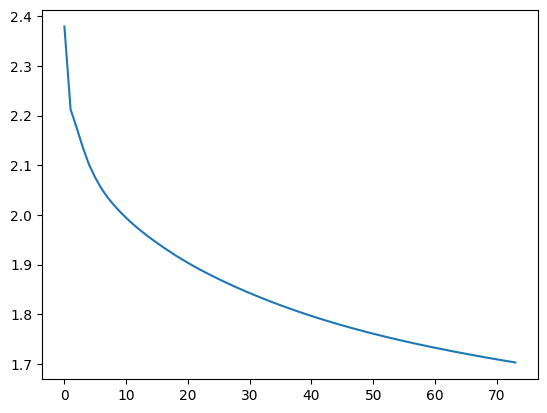

In [35]:
plt.plot(nn_model.history)

In [36]:
test_path = "data/genre-classification-imdb/test_data_solution.txt"
x_test, y_test, labels = read_imdb(path)

/content/pka-deeplearning-midterm/utils/data_loader.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [37]:
labels

Index(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western'],
      dtype='object')

In [39]:
test_preprocessed = preprocess_ds(x_test[:1000])
test_embedded = vectorize_ds(test_preprocessed, embedding_model, 100)

In [40]:
test_embedded.shape

(1000, 100, 25)

In [41]:
y_pred = nn_model.predict(test_embedded)

In [42]:
cross_entropy_loss(y_test[:1000], y_pred)

1.6668812695016295

In [46]:
from model.metrics import *

In [47]:
accuracy(y_test[:1000], y_pred)

0.515

In [48]:
precision(y_test[:1000], y_pred)

array([0.10343145, 0.11593619, 0.02788562, 0.03065507, 0.01081067,
       0.26609343, 0.01725335, 0.57767848, 0.43663364, 0.03972389,
       0.00918139, 0.16166257, 0.01420403, 0.24501225, 0.2596954 ,
       0.00249338, 0.01392999, 0.01495322, 0.08075779, 0.04411519,
       0.09575358, 0.17245388, 0.24180444, 0.06477187, 0.08646699,
       0.        , 0.41743152])

In [50]:
recall(y_test[:1000], y_pred)

/content/pka-deeplearning-midterm/model/metrics.py:46: RuntimeWarning: invalid value encountered in divide
  return np.where(actual_positives > 0, true_positives / actual_positives, 0.0)


array([0.11748636, 0.06023887, 0.03633894, 0.03230008, 0.00661905,
       0.29738565, 0.01654052, 0.5539972 , 0.41213882, 0.03134941,
       0.00753559, 0.87739049, 0.02070818, 0.22908699, 0.26632449,
       0.00910781, 0.01989429, 0.01279625, 0.07790147, 0.0676557 ,
       0.09496506, 0.19718134, 0.26410095, 0.05430165, 0.05796137,
       0.        , 0.42333738])